In [1]:
# Some initializations
import numpy as np
import torch
import torchvision
from skimage import color
import random
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../src/'))

import lib.utils as utils

config_fn = os.path.abspath('../experiments_cfg/default.toml')
conf = utils.get_config(config_fn)

%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from lib.data.siamese_worms_dataset import SiameseWormsDataset
train_data = SiameseWormsDataset(conf['path']['worms_dataset'],
                                 conf['path']['cpm_dataset'],
                                 patch_size=(100,100,100))

In [3]:
# helper function for visualization
def plot_train_data(sample, num_slice=5):
    raw1 = sample['raw1'].numpy()
    raw2 = sample['raw2'].numpy()
    label1 = sample['label1'].numpy()
    label2 = sample['label2'].numpy()
    
    # plot only num_slices of z
    slices = random.choices(range(raw1.shape[-1]), k=num_slice)
    
    fig = plt.figure(figsize=(15,15))
    for no, sl in enumerate(slices):
        fig.add_subplot(num_slice, 4, no*4+1)
        plt.imshow(np.squeeze(raw1[:,:,sl]), cmap='gray')
        
        fig.add_subplot(num_slice, 4, no*4+2)
        l1 = np.squeeze(label1[:, :, sl])
        plt.imshow(color.label2rgb(l1, bg_label=0))
        
        fig.add_subplot(num_slice, 4, no*4+3)
        plt.imshow(np.squeeze(raw2[:,:,sl]), cmap='gray')
        
        fig.add_subplot(num_slice, 4, no*4+4)
        l2 = np.squeeze(label2[:, :, sl])
        plt.imshow(color.label2rgb(l2, bg_label=0))

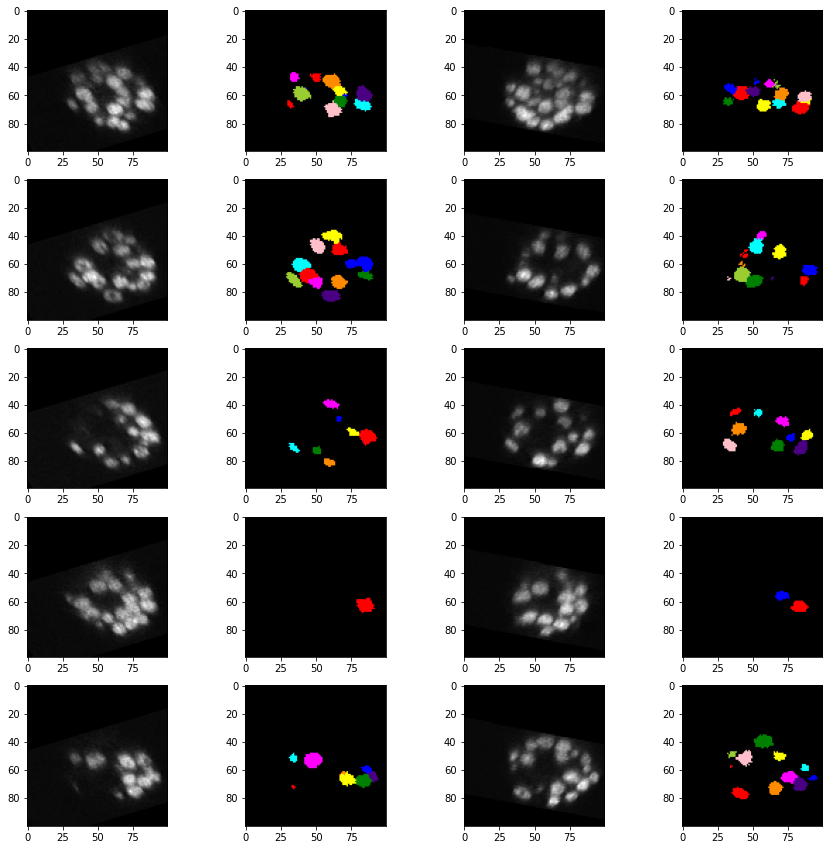

In [4]:
sample = iter(train_data).__next__()
plot_train_data(sample)

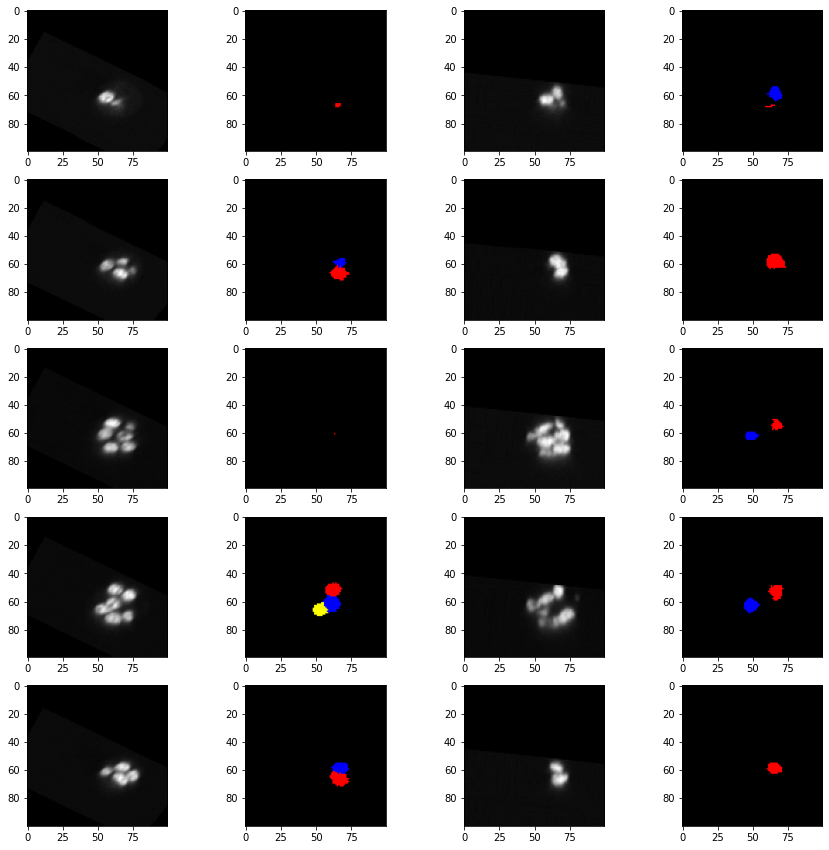

In [5]:
sample = iter(train_data).__next__()
plot_train_data(sample)

In [6]:
from scipy import stats

def plot_train_data_mode(sample, num_slice=5, average_thickness=20):
    raw1 = sample['raw1'].numpy()
    raw2 = sample['raw2'].numpy()
    label1 = sample['label1'].numpy()
    label2 = sample['label2'].numpy()
    
    # plot only num_slices of z
    slices = random.choices(range(raw1.shape[-1]-average_thickness), k=num_slice)
    
    fig = plt.figure(figsize=(15,15))
    for no, sl in enumerate(slices):
        fig.add_subplot(num_slice, 4, no*4+1)
        r1 = np.average(raw1[:, :, sl:sl+average_thickness], axis=-1)
        plt.imshow(np.squeeze(r1), cmap='gray')
        
        fig.add_subplot(num_slice, 4, no*4+2)
#         l1 = np.average(label1[:, :, sl:sl+average_thickness], axis=-1)
        l1 = stats.mode(label1[:, :, sl:sl+average_thickness], axis=2)[0]
        l1 = np.squeeze(l1)
        plt.imshow(color.label2rgb(l1, bg_label=0))
        
        fig.add_subplot(num_slice, 4, no*4+3)
        r2 = np.average(raw2[:, :, sl:sl+average_thickness], axis=-1)
        plt.imshow(np.squeeze(r2), cmap='gray')
        
        fig.add_subplot(num_slice, 4, no*4+4)
#         l2 = np.average(label2[:, :, sl:sl+average_thickness], axis=-1)
        l2 = stats.mode(label2[:, :, sl:sl+average_thickness], axis=2)[0]
        l2 = np.squeeze(l2)
        plt.imshow(color.label2rgb(l2, bg_label=0))

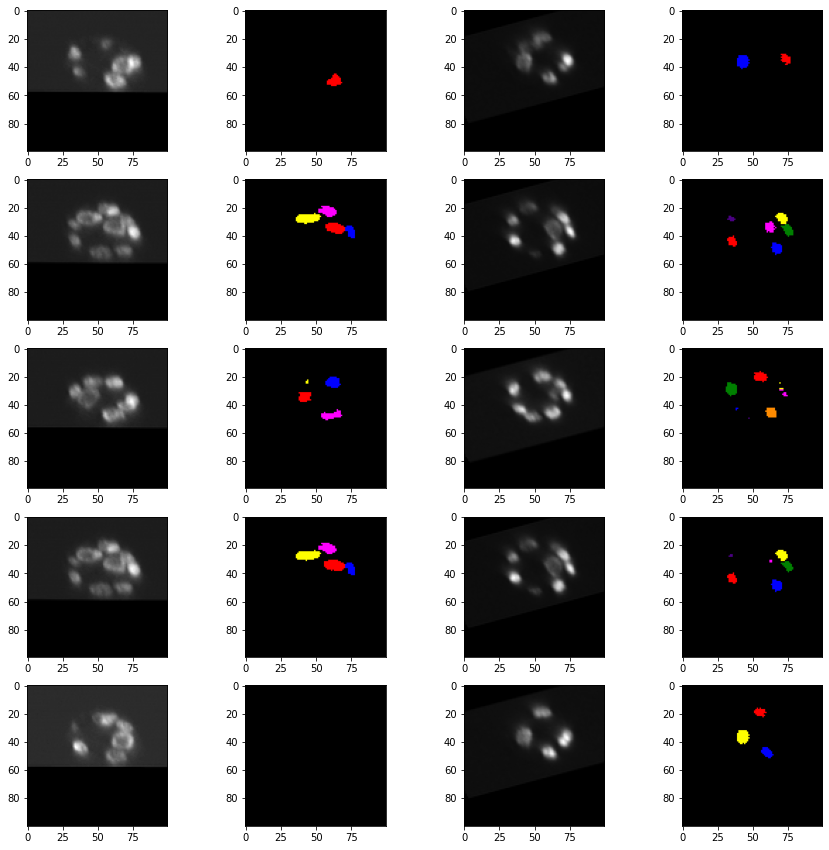

In [7]:
sample = iter(train_data).__next__()
plot_train_data_mode(sample)

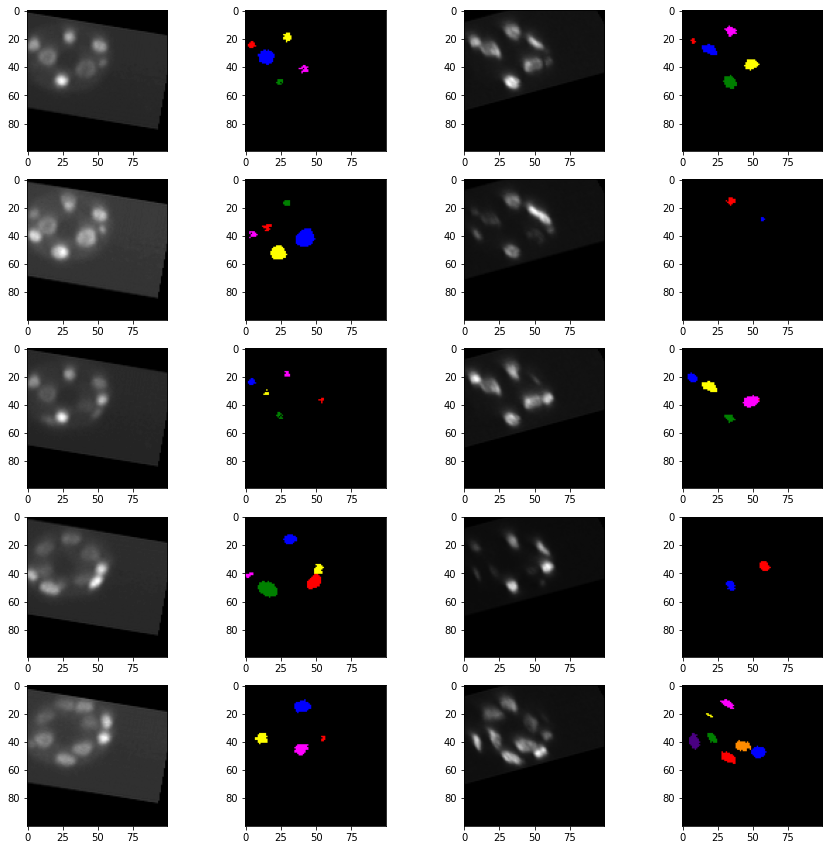

In [8]:
sample = iter(train_data).__next__()
plot_train_data_mode(sample)